In [2]:
sources = [{'name': 'unicef_sowc',
            'url': 'https://data.unicef.org/wp-content/uploads/2023/04/SOWC-2023-Statistical-tables-All-EN.xlsx'}, 
           {'name': 'undp_hdr',
            'url': 'https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv'},
           {'name': 'worldbank_wbi',
            'url': 'https://datacatalogfiles.worldbank.org/ddh-published/0037712/DR0090755/CLASS.xlsx'},
           {'name': 'fundforpeace_fsi',
            'url': 'https://fragilestatesindex.org/wp-content/uploads/2023/06/FSI-2023-DOWNLOAD.xlsx'}]
import pandas as pd
df_indicators = pd.read_csv('country_indicators.csv')
df_indicators # 218 rows × 1332 columns

,Unnamed: 0,sowc_demographics__population-thousands-2021_total,sowc_demographics__population-thousands-2021_under-18,sowc_demographics__population-thousands-2021_under-5,sowc_demographics__annual-population-growth-rate_2000-2020,sowc_demographics__annual-population-growth-rate_2020-2030-a,sowc_demographics__annual-number-of-births-thousands-2021_2020-2030-a,sowc_demographics__total-fertility-live-births-per-woman-2021_2020-2030-a,sowc_demographics__life-expectancy-at-birth-years_1970,sowc_demographics__life-expectancy-at-birth-years_2000-0,...,fsi_e3:_human_flight_and_brain_drain,fsi_e2:_economic_inequality,fsi_e1:_economy,fsi_p1:_state_legitimacy,fsi_p2:_public_services,fsi_p3:_human_rights,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category
0,0,40099.4620,20297.8860,6490.5540,3.286824,2.325169,1440.941,4.6434,37.4178,55.2978,...,8.5,8.2,9.6,9.4,10.0,8.7,9.7,8.7,7.7,Alert
1,1,2854.7100,574.3875,141.3930,0.496681,0.248324,29.289,1.3897,64.8239,75.4043,...,8.5,2.9,6.1,5.0,3.8,3.6,4.8,6.2,5.5,Stable
2,2,44177.9685,15526.2050,4870.8425,1.642661,1.237367,950.888,2.8886,43.1597,70.4779,...,5.1,5.2,6.2,7.6,5.0,6.9,5.8,6.9,3.1,Warning
3,3,79.0340,12.7765,2.5385,0.770116,0.437249,0.567,1.1254,74.2557,80.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,34503.7735,17832.9760,5983.4065,3.392806,2.684447,1338.792,5.3044,40.1904,46.0236,...,5.6,8.8,8.2,8.1,8.8,6.3,6.6,7.2,4.0,Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_preds = pd.read_csv('test_predictions.csv')
df_preds #original test_predictions.csv

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3
0,202211,FJ,False,0.183897,False,False,0.066500,False,False,0.409958,False,FJI
1,202212,FJ,False,0.267831,False,False,0.099643,False,False,0.406696,False,FJI
2,202211,TZ,False,0.482585,False,True,0.704086,True,True,0.545236,False,TZA
3,202212,TZ,False,0.187792,False,True,0.638444,True,True,0.534560,False,TZA
4,202301,TZ,True,0.539319,True,True,0.608380,False,True,0.538583,True,TZA
...,...,...,...,...,...,...,...,...,...,...,...,...
359,202211,MJ,False,0.182196,False,False,0.079453,False,False,0.291874,False,MNE
360,202212,MJ,False,0.203236,False,False,0.060189,False,False,0.300321,False,MNE
361,202211,TD,True,0.527107,False,True,0.697625,True,False,0.335496,False,TTO
362,202212,TD,True,0.555677,False,True,0.729246,False,False,0.324000,False,TTO


In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
# Used to find out all Asian country in the 'country_indicators.csv'
selected_iso3 = ['CHN','SGP','PAK','PHL','IND','IRN','THA','JPN','PRK','KOR','VNM','SAU','ISR','MDV',
                 'IDN','TWN','BGD','ARM','MYS','LKA','AFG','IRQ','ARE','QAT','MMR','LBN','SYR','KHM',
                'YEM','UZB','NPL','KWT','OMN','MNG','MAC','BHR','JOR','KGZ','LAO']
selected_rows = df_preds[df_preds['iso3'].isin(selected_iso3)]
new_df = selected_rows
new_df.to_csv('selected_rows.csv',index=False) #out put the file

In [6]:
df_new = pd.read_csv('selected_rows.csv')
df_new 
# This the the new Dataframe for Asian country

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,False,UZB
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,False,UZB
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,False,UZB
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,False,IDN
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,False,IDN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,False,JPN
72,202212,JA,False,0.191392,False,False,0.209022,False,False,0.272838,False,JPN
73,202211,SA,False,0.450048,False,False,0.495618,True,False,0.365198,False,SAU
74,202212,SA,False,0.443690,False,False,0.428008,False,False,0.366745,False,SAU


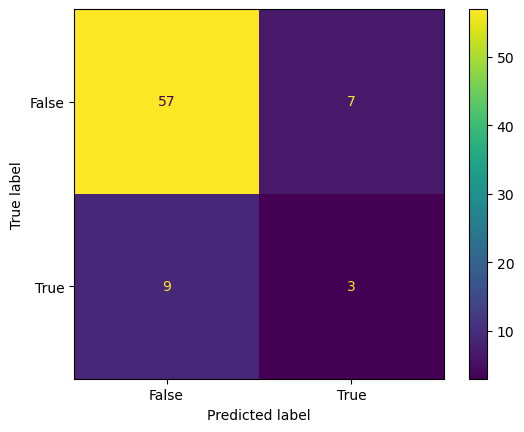

In [7]:
_ = ConfusionMatrixDisplay.from_predictions(df_new.y_true_ffnn, df_new.y_pred_ffnn)

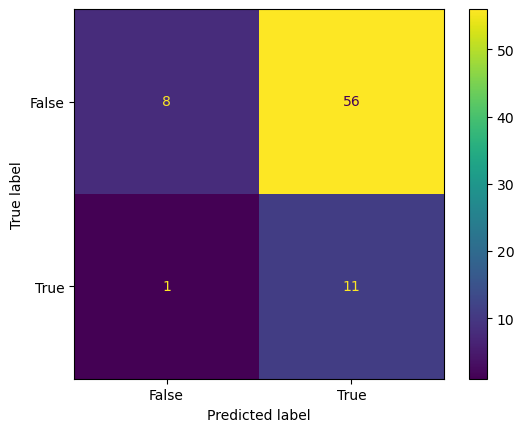

In [8]:
threshold = 0.3
_ = ConfusionMatrixDisplay.from_predictions(df_new.y_true_ffnn, 
                                            df_new.y_pred_proba_ffnn>threshold)

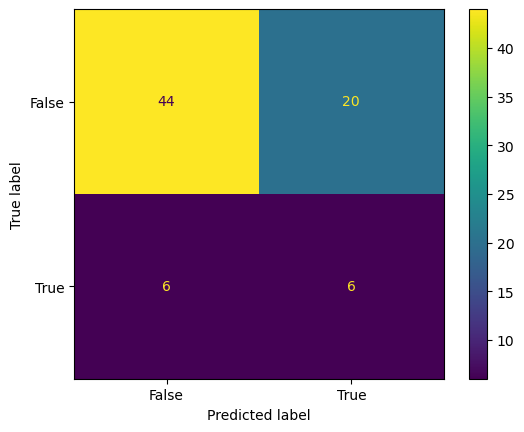

In [9]:
threshold = 0.4
_ = ConfusionMatrixDisplay.from_predictions(df_new.y_true_ffnn, 
                                            df_new.y_pred_proba_ffnn>threshold)

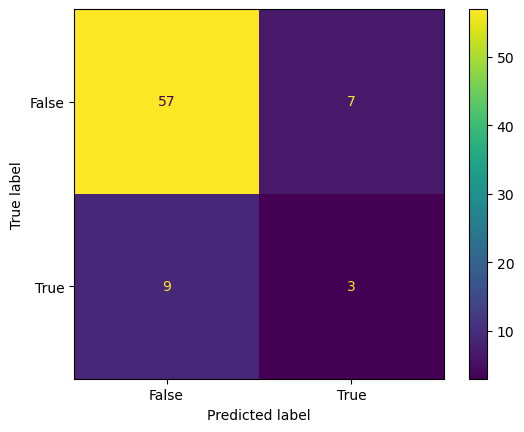

In [10]:
threshold = 0.5
_ = ConfusionMatrixDisplay.from_predictions(df_new.y_true_ffnn, 
                                            df_new.y_pred_proba_ffnn>threshold)

## Accuracy is a common metric used to evaluate the performance of a classification model
## Except accuracy, other metrics like sensitivity and specificity are equally important.


>Sensitivity measures the model's ability to correctly identify positive cases (True Positives) out of all actual positive cases (True Positives + False Negatives).
It's calculated as Sensitivity $= TP / (TP + FN)$.
Sensitivity is particularly important when the cost of missing a positive case is high. Sensitivity reduces the mistake of False Negative(Type2 mistake). For example,you want to minimize false negatives to avoid missing potentially threatens to some particular countries.


>Specificity measures the model's ability to correctly identify negative cases (True Negatives) out of all actual negative cases (True Negatives + False Positives).
It's calculated as Specificity $= TN / (TN + FP)$.
Specificity is important when the cost of incorrectly identifying a negative case as positive is high. The specificity gets higher, the False Positive mistakes(Type1 mistake) would be more impossible than before to happen.For example, you want to minimize false positives to avoid unnecessary waste resources to those countries or areas which won’t be under attack, this could help to allocate resources more efficiently.


## How sensitivity and specificity effect UNICEF
Sensitivity is the true positive rate, specificity is the true negative rate. Both of them are true, but one predicts that the conflict will escalate, the other predicts that the conflict will not escalate. This means that sensitivity and specificity are content that we have successfully predicted, and as data scientists, we want to have as many correct data as possible, so a high value of these two means that we have a high probability of successfully predicting future events, which means we can prepare for them in advance. On the other hand, if the number of these data are low, it means that our preparation is meaningless. 
>Since our prediction is wrong, we can only improvise in the future rather than directly lock the target. It is important for UNICEF to predict conflict escalation because they don't have the resources to cover all the countries in the world, so they can only predict which countries are most likely to experience conflict escalation, and place the resources in advance.

## We want to examin the effect of classificaiton thresholding on sensitivity and specificity. 

Sensitivity  ：$TP / (TP + FN)$

Specificity  ：$TN / (TN + FP)$

For a thresholding of 0.5：

Sensitivity $= TP / (TP + FN) = 3 / (3 + 57) = 0.05$

Specificity $= TN / (TN + FP) = 9 / (9 + 7) = 0.56$

For a thresholding of 0.4：

Sensitivity $= TP / (TP + FN) = 6 / (6 + 44) = 0.12$

Specificity $= TN / (TN + FP) = 6 / (6 + 20) = 0.23$

For a thresholding of 0.3：

Sensitivity $= TP / (TP + FN) = 11 / (11 + 8) = 0.3$

Specificity $= TN / (TN + FP) = 1 / (1 + 56) = 0.02$
***
|thresholding|Sensitivity|Specificity|
|---|---|---|
|0.5|0.05|0.56|
|0.4|0.12|0.23|
|0.3|0.3|0.02|

>We found that when the thresholding was lowered, sensitivity increased and specificity decreased. Increased sensitivity is usually accompanied by a decrease in specificity, which increases the risk of False Positive errors (Type 1 errors). Because it is easier for the model to classify samples as positive examples, it may mistakenly misclassify some negative examples as positive examples. If we value more accurate predictions of conflicts in Asia, then we may pay more attention to the sensitivity of the model. In this context, high sensitivity means that we want the model to be able to detect as many actual regional conflict events as possible. This is because in the prediction of regional conflicts, missing any real conflict event may lead to major social and humanitarian crises. Therefore, we are willing to tolerate some false positives to ensure that potential conflict events are not missed.

>When we are more concerned with reducing false negatives, we usually choose a lower classification thresholding, which increases the sensitivity of the model. But be aware that this may increase the number of false positives, so there is a trade-off in practical applications.

## Assignment 1 next step

In [11]:
import numpy as np

In [12]:
df_new

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,False,UZB
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,False,UZB
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,False,UZB
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,False,IDN
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,False,IDN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,False,JPN
72,202212,JA,False,0.191392,False,False,0.209022,False,False,0.272838,False,JPN
73,202211,SA,False,0.450048,False,False,0.495618,True,False,0.365198,False,SAU
74,202212,SA,False,0.443690,False,False,0.428008,False,False,0.366745,False,SAU


## Q1

### Create the Prediciton Probability "Error" results for the xgboost and ffnn models analagously to the transformer model produced above.

In [13]:
# Prediction Probability "Error" for transformer
df_preds['transformer_probability_prediction_error'] = np.abs(df_preds['y_true_transformer'].astype(float) - df_preds['y_pred_proba_transformer'])
df_preds[['y_true_transformer','y_pred_proba_transformer','transformer_probability_prediction_error']]

,y_true_transformer,y_pred_proba_transformer,transformer_probability_prediction_error
0,False,0.183897,0.183897
1,False,0.267831,0.267831
2,False,0.482585,0.482585
3,False,0.187792,0.187792
4,True,0.539319,0.460681
...,...,...,...
359,False,0.182196,0.182196
360,False,0.203236,0.203236
361,False,0.527107,0.527107
362,False,0.555677,0.555677


In [14]:
# Prediction Probability "Error" for xgboost
df_preds['xgboost_probability_prediction_error'] = np.abs(df_preds['y_true_xgboost'].astype(float) - df_preds['y_pred_proba_xgboost'])
df_preds[['y_true_xgboost','y_pred_proba_xgboost','xgboost_probability_prediction_error']]

,y_true_xgboost,y_pred_proba_xgboost,xgboost_probability_prediction_error
0,False,0.066500,0.066500
1,False,0.099643,0.099643
2,True,0.704086,0.295914
3,True,0.638444,0.361556
4,False,0.608380,0.608380
...,...,...,...
359,False,0.079453,0.079453
360,False,0.060189,0.060189
361,True,0.697625,0.302375
362,False,0.729246,0.729246


In [15]:
# Prediction Probability "Error" for ffnn
df_preds['ffnn_probability_prediction_error'] = np.abs(df_preds['y_true_ffnn'].astype(float) - df_preds['y_pred_proba_ffnn'])
df_preds[['y_true_ffnn','y_pred_proba_ffnn','ffnn_probability_prediction_error']]

,y_true_ffnn,y_pred_proba_ffnn,ffnn_probability_prediction_error
0,False,0.409958,0.409958
1,False,0.406696,0.406696
2,False,0.545236,0.545236
3,False,0.534560,0.534560
4,True,0.538583,0.461417
...,...,...,...
359,False,0.291874,0.291874
360,False,0.300321,0.300321
361,False,0.335496,0.335496
362,False,0.324000,0.324000


## Q2
### 2. Create a bootsrap confidence interval for the average Prediction Probability "Error" for one of these models using all the data.


> In this context "using all the data" means using all the predictions made for a given model under consideration; whereas, "using a data subset" would mean restricting the rows of the data on the basis of one (or more) of the columns from the "Progress Indicators" data so as to only consider the predictions made for the given model under consideration within a given subset of (the countries of) the data.


In [16]:
# I choose ffnn to do the bootsrap confidence interval for 90%
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_ffnn = np.random.choice(df_preds.ffnn_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_ffnn.mean()
np.quantile(my_bootstrapped_sample_means, [0.05,0.95])

array([0.39546702, 0.44078702])

In [17]:
0.4375-0.3946

0.042899999999999994

In [18]:
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_xgboost = np.random.choice(df_preds.xgboost_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_xgboost.mean()
np.quantile(my_bootstrap_sample_ffnn, [0.05,0.95])

array([0.27894504, 0.63068192])

In [19]:
0.6168-0.2853

0.3315

In [20]:
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_transformer = np.random.choice(df_preds.transformer_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_transformer.mean()
np.quantile(my_bootstrapped_sample_means, [0.05,0.95])

array([0.40866142, 0.47314292])

In [21]:
0.4720-0.4084

0.06359999999999999

# Q3
### 3. Create the Prediction Classification "Correctness" results of "correct" and "incorrect" predictions for the `transformer`, `xgboost` and `ffnn` models; or, an alternative "either/or" breakdown of interest (such as "wrongly predicted no escalation" versus all the other categories combined).

In [22]:
# Prediction Classification "Correctness" for transformer
threshold = 0.5 # using default classification threshold

df_preds['transformer_classifcation_performance_outcome'] = None

tmp = df_preds['transformer_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_preds['transformer_classifcation_performance_outcome'] = tmp
df_preds[['y_true_transformer','y_pred_transformer','transformer_classifcation_performance_outcome']]

,y_true_transformer,y_pred_transformer,transformer_classifcation_performance_outcome
0,False,False,correctly predicted no escalation
1,False,False,correctly predicted no escalation
2,False,False,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,True,True,correctly predicted escalation
...,...,...,...
359,False,False,correctly predicted no escalation
360,False,False,correctly predicted no escalation
361,False,True,wrongly predicted escalation
362,False,True,wrongly predicted escalation


In [23]:
# Prediction Classification "Correctness" for xgboost
threshold = 0.5 # using default classification threshold

df_preds['xgboost_classifcation_performance_outcome'] = None

tmp = df_preds['xgboost_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_preds['xgboost_classifcation_performance_outcome'] = tmp
df_preds[['y_true_xgboost','y_pred_xgboost','transformer_classifcation_performance_outcome']]

,y_true_xgboost,y_pred_xgboost,transformer_classifcation_performance_outcome
0,False,False,correctly predicted no escalation
1,False,False,correctly predicted no escalation
2,True,True,correctly predicted no escalation
3,True,True,correctly predicted no escalation
4,False,True,correctly predicted escalation
...,...,...,...
359,False,False,correctly predicted no escalation
360,False,False,correctly predicted no escalation
361,True,True,wrongly predicted escalation
362,False,True,wrongly predicted escalation


In [24]:
# Prediction Classification "Correctness" for ffnn
threshold = 0.5 # using default classification threshold

df_preds['ffnn_classifcation_performance_outcome'] = None

tmp = df_preds['ffnn_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_preds.y_true_transformer) & (df_preds.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_preds.y_true_transformer & (df_preds.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_preds['ffnn_classifcation_performance_outcome'] = tmp
df_preds[['y_true_ffnn','y_pred_ffnn','ffnn_classifcation_performance_outcome']]

,y_true_ffnn,y_pred_ffnn,ffnn_classifcation_performance_outcome
0,False,False,correctly predicted no escalation
1,False,False,correctly predicted no escalation
2,False,True,correctly predicted no escalation
3,False,True,correctly predicted no escalation
4,True,True,correctly predicted escalation
...,...,...,...
359,False,False,correctly predicted no escalation
360,False,False,correctly predicted no escalation
361,False,False,wrongly predicted escalation
362,False,False,wrongly predicted escalation


In [25]:
df_preds[['y_true_ffnn','y_pred_ffnn','ffnn_classifcation_performance_outcome']].\
ffnn_classifcation_performance_outcome.value_counts()

correctly predicted no escalation    193
wrongly predicted escalation         117
correctly predicted escalation        32
wrongly predicted no escalation       22
Name: ffnn_classifcation_performance_outcome, dtype: int64

# Country data

In [26]:
# Prediction Classification "Correctness" for transformer
threshold = 0.5 # using default classification threshold

df_new['transformer_classifcation_performance_outcome'] = None

tmp = df_new['transformer_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_new.y_true_transformer & (df_new.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_new.y_true_transformer & (df_new.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_new['transformer_classifcation_performance_outcome'] = tmp
df_new[['y_true_transformer','y_pred_transformer','transformer_classifcation_performance_outcome']]

,y_true_transformer,y_pred_transformer,transformer_classifcation_performance_outcome
0,False,True,wrongly predicted escalation
1,False,True,wrongly predicted escalation
2,False,False,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,False,False,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,False,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


In [27]:
df_new[['y_true_transformer','y_pred_transformer','transformer_classifcation_performance_outcome']].\
transformer_classifcation_performance_outcome.value_counts()

correctly predicted no escalation    33
wrongly predicted escalation         31
correctly predicted escalation        9
wrongly predicted no escalation       3
Name: transformer_classifcation_performance_outcome, dtype: int64

In [28]:
# Prediction Classification "Correctness" for xgboost
threshold = 0.5 # using default classification threshold

df_new['xgboost_classifcation_performance_outcome'] = None

tmp = df_new['xgboost_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_new.y_true_transformer & (df_new.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_new.y_true_transformer & (df_new.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_new['xgboost_classifcation_performance_outcome'] = tmp
df_new[['y_true_xgboost','y_pred_xgboost','xgboost_classifcation_performance_outcome']]

,y_true_xgboost,y_pred_xgboost,xgboost_classifcation_performance_outcome
0,False,True,wrongly predicted escalation
1,False,True,wrongly predicted escalation
2,False,True,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,True,True,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,True,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


In [29]:
df_new[['y_true_xgboost','y_pred_xgboost','transformer_classifcation_performance_outcome']].\
transformer_classifcation_performance_outcome.value_counts()

correctly predicted no escalation    33
wrongly predicted escalation         31
correctly predicted escalation        9
wrongly predicted no escalation       3
Name: transformer_classifcation_performance_outcome, dtype: int64

In [30]:
# Prediction Classification "Correctness" for ffnn
threshold = 0.5 # using default classification threshold

df_new['ffnn_classifcation_performance_outcome'] = None

tmp = df_new['ffnn_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df_new.y_true_transformer & (df_new.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df_new.y_true_transformer) & (df_new.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df_new.y_true_transformer & (df_new.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df_new['ffnn_classifcation_performance_outcome'] = tmp
df_new[['y_true_ffnn','y_pred_ffnn','ffnn_classifcation_performance_outcome']]

,y_true_ffnn,y_pred_ffnn,ffnn_classifcation_performance_outcome
0,False,False,wrongly predicted escalation
1,False,False,wrongly predicted escalation
2,False,False,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,False,False,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,False,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


In [31]:
df_new[['y_true_ffnn','y_pred_ffnn','ffnn_classifcation_performance_outcome']].ffnn_classifcation_performance_outcome.value_counts()

correctly predicted no escalation    33
wrongly predicted escalation         31
correctly predicted escalation        9
wrongly predicted no escalation       3
Name: ffnn_classifcation_performance_outcome, dtype: int64

# Q4
### 4. Perform a one sample hypothesis test of the proportion of a specific Prediction Classification "Correctness" category for another of these models using all the data.

When performing a hypothesis test you'll need to determine and specify the null hypothesis under consideration; obtain a p-value (either through simulation, or `scipy.stats.binom` or `scipy.stats.ttest_1samp`); and, finally, provide a statement of the degree of evidence against the null hypothesis in the usual manner (of https://www.jcpcarchives.org/userfiles/values-of-p-Inference.jpg).

In [32]:
# I choose xgboost to do the one sample hypothesis test, for correctly predicted escalation
# Assume correctly predicted escalation's p value is 0.1

In [33]:
df_preds[df_preds.transformer_classifcation_performance_outcome == "correctly predicted escalation"].count()

yearmonth                                        32
fips                                             32
y_pred_transformer                               32
y_pred_proba_transformer                         32
y_true_transformer                               32
y_pred_xgboost                                   32
y_pred_proba_xgboost                             32
y_true_xgboost                                   32
y_pred_ffnn                                      32
y_pred_proba_ffnn                                32
y_true_ffnn                                      32
iso3                                             32
transformer_probability_prediction_error         32
xgboost_probability_prediction_error             32
ffnn_probability_prediction_error                32
transformer_classifcation_performance_outcome    32
xgboost_classifcation_performance_outcome        32
ffnn_classifcation_performance_outcome           32
dtype: int64

In [34]:
rep, n =1000,364
p = 0.1
correct_p = []
np.random.seed()
for i in range(rep):
    sample = np.random.choice(["correct","incorrect"], size = n, replace = True, p = [p, 1-p])
    sample_prop = np.count_nonzero(sample == "correct")/n
    correct_p.append(sample_prop)
given = 32/364
extreme_num = (abs(np.array(correct_p)-p) >= abs(given-p)).sum()
p_value = np.round(extreme_num / rep, 3)
p_value

0.466

In [35]:
# This show the No evidence against the null hypothesis.

## Q5
### 5. Consider the "Progress Indicators" data and use "boolean selection" with one (or more) of the columns to restrict the data to a subset (of rows) of data and repeat either of the (confidence interval and hypothesis testing) analyses above but this time instead only using this specified subset of countries.

*Potentially relevant subsets of data that might be of interest could be created on the basis of Human Development Index categories, Fragile States Index categories, World Bank economy categories, etc. (e.g., `'fsi_category', 'hdr_hdicode', 'hdr_region', 'wbi_income_group', 'wbi_lending_category', 'wbi_other_(emu_or_hipc)'`, etc.); or, perhaps by alternative boolean selections based on restricting the data to countries with specific continuous variable values that fall within specified thresholds or limits.* 


In [36]:
selected_iso3 = ['CHN','SGP','PAK','PHL','IND','IRN','THA','JPN','PRK','KOR','VNM','SAU','ISR','MDV',
                 'IDN','TWN','BGD','ARM','MYS','LKA','AFG','IRQ','ARE','QAT','MMR','LBN','SYR','KHM',
                'YEM','UZB','NPL','KWT','OMN','MNG','MAC','BHR','JOR','KGZ','LAO']
selected_rows = df_preds[df_preds['iso3'].isin(selected_iso3)]
df_PI = selected_rows
df_PI.to_csv('selected_for_PI.csv',index=False)

In [37]:
df_PI = pd.read_csv('selected_rows.csv')
df_PI 

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,False,UZB
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,False,UZB
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,False,UZB
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,False,IDN
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,False,IDN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,False,JPN
72,202212,JA,False,0.191392,False,False,0.209022,False,False,0.272838,False,JPN
73,202211,SA,False,0.450048,False,False,0.495618,True,False,0.365198,False,SAU
74,202212,SA,False,0.443690,False,False,0.428008,False,False,0.366745,False,SAU


In [38]:
df = df_PI.merge(df_indicators, left_on='iso3', right_on='iso3', how='inner')
df #the DataFrame of asian countries

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_e3:_human_flight_and_brain_drain,fsi_e2:_economic_inequality,fsi_e1:_economy,fsi_p1:_state_legitimacy,fsi_p2:_public_services,fsi_p3:_human_rights,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,...,5.7,4.4,4.1,4.7,5.9,6.5,5.2,7.1,3.7,Warning
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,...,5.7,4.4,4.1,4.7,5.9,6.5,5.2,7.1,3.7,Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,...,2.7,2.9,3.5,0.3,1.8,2.8,1.5,2.6,2.0,Stable
72,202212,JA,False,0.191392,False,False,0.209022,False,False,0.272838,...,2.7,2.9,3.5,0.3,1.8,2.8,1.5,2.6,2.0,Stable
73,202211,SA,False,0.450048,False,False,0.495618,True,False,0.365198,...,2.7,4.8,3.6,7.6,3.8,8.1,5.1,8.5,4.1,Warning
74,202212,SA,False,0.443690,False,False,0.428008,False,False,0.366745,...,2.7,4.8,3.6,7.6,3.8,8.1,5.1,8.5,4.1,Warning


In [39]:
df['fsi_category'].value_counts()

Warning    41
Alert      18
Stable     17
Name: fsi_category, dtype: int64

In [40]:
41/76


0.5394736842105263

In [41]:
## Here I want to use the fsi_category as the item to Hypothesis testing
## Null hypothesis: assume the p_value of Warning condition in Asian country is 0.5

In [42]:
rep, n = 1000, 76
p = 0.5
warn_list = []
np.random.seed()
for i in range(rep):
    sample = np.random.choice(['Warning','unWarning'],size = n, replace = True, p = [p,1-p])
    sample_prop = np.count_nonzero(sample == 'Warning')/n
    warn_list.append(sample_prop)
given = 41/76
extreme = (abs(np.array(warn_list) - p) >= abs (given - p)).sum()
p_value = np.round(extreme/rep,3)
p_value

0.592

In [43]:
np.quantile(warn_list,[0.05,0.95])

array([0.40723684, 0.60526316])

## Q6
### 6. (and 7.) Create a two-sample bootstrap confidence interval and perform a hypothesis test comparing the performance of a single model for the data subset created above versus the remaining data not included in that data subset.

  - A two-sample bootstrap confidence interval is created by repeatedly creating a "'pair" of bootrapped samples" by making a single bootstrap sample for one of the two data subsets individually, and then the other, and then those two "single sample" bootstrapped stamples together make up the "'pair" of bootrapped samples".
  <br><br>
    
  - A hypothesis test for two ("unpaired") samples can be carried out on the basis of permutating shuffling group membership (while ensuring that the original subset sample sizes remain unchanged) in order to create a sampling distribution under a null hypothesis assumption of "no difference between groups", or based on `scipy.stats.median_test` which assumes the *medians* of the two groups are identical (or the more powerful `scipy.stats.mannwhitneyu` which again assumes "no difference between groups"), or `scipy.stats.ttest_ind` which assumes the *means* of the two groups are identical (and that the samples come from normally distributed populations).

In [44]:
rep = 1000
bootstrap_differences = np.zeros(rep)
group1 = df['y_pred_proba_ffnn'][df['fsi_category'] == 'Warning']
group2 = df['y_pred_proba_ffnn'][df['fsi_category'] != 'Warning']
for i in range(rep):
    sample1 = group1.sample(frac=1, replace=True)
    sample2 = group2.sample(frac=1, replace=True)
    difference = sample1.mean() - sample2.mean()
    bootstrap_differences[i] = abs(difference)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])
print(confidence_interval)

[0.00075514 0.03995951]


In [45]:
observed_difference = group1.mean() - group2.mean()
differences = np.zeros(rep)
for i in range(rep):
    combined_sample = df['y_pred_proba_ffnn'].sample(frac=1, replace=True)
    new_group1 = combined_sample[df['fsi_category'] == 'Warning']
    new_group2 = combined_sample[df['fsi_category'] != 'Warning']
    difference = new_group1.mean() - new_group2.mean()
    differences[i] = abs(difference)

p_value = (differences >= observed_difference).mean()
print(p_value)

0.856


## Q8 and Q9

> 8. (and 9.) Create a bootstrap confidence interval and a hypothesis test comparing the performance of two the models across all the data on the basis of a "paired" sample analysis (by transforming the paired sample into a single $z_i=x_i-y_i$ difference sample).
    - A bootstrap confidence interval is created by bootrapping from the sample of "paired differences"; whereas, the sampling distribution of the null hypothesis of "the group an observation belongs to doesn't matter" can be constructed using a permutation shuffling approach which randomly reassigns the sample membership within each of the paired samples. Functions performing theoretical nonparametric and parametric "paired" sample analyses are `scipy.stats.wilcoxon` and `scipy.stats.ttest_rel`, where the null hypothesis of the former assumes the slightly different "no tendency for one of the samples in the pair to be larger than the other", while the null hypothesis of the latter assumes "no difference on average" between the pairs (and that the samples come from normally distributed populations).

In [46]:
import numpy as np

# arbitrary simulation parameters
n,R = 5,100
results=[]
# a first "sample"
sample_1 = df_new['y_pred_proba_transformer']
# a second "sample"
sample_2 = df_new['y_pred_proba_xgboost']

# "paired" samples analysis
sample_difference = sample_1 - sample_2

# bootstrapping a "paired" sample
for rep in range(R):
    bootstrap_sample = np.random.choice(sample_difference, size=n)
    aver = bootstrap_sample.mean()
    results.append(aver)

ci = np.percentile(results, [2.5, 97.5])
print(ci)

[-0.200968    0.10393999]


## Q10

XGBoost is a model based on gradient boosting trees, mainly used to solve classification and regression problems, especially suitable for structured data. This modal is simpler and easier to understand compared to other two modals.
FFNN is a feedforward neural network-based model that is commonly used on various types of data, including structured and unstructured data such as images, text, and time series data.
Transformer is a deep learning model for processing sequence data, especially suitable for natural language processing (NLP) and machine translation tasks. This is more complicated and difficult to understand.

Specifically, they calculated the error between each model’s classification probability prediction and the true label, and classified the predictions into the following four categories:

> Correctly predicting upgrades: The model correctly predicted positive classes (upgrades).
Correct prediction without upgrading: The model correctly predicted the negative class (without upgrading).
Wrong prediction upgrade: The model incorrectly predicts the sample as a positive category.
Wrong predictions are not upgraded: The model incorrectly predicts samples as negative categories.

Specifically, each model's performance in four categories can be observed to understand its classification performance. Generally, better-performing models have higher proportions in the Correctly Predicted Upgrades and Correctly Predicted No Upgrades categories, and lower proportions in the "Incorrectly Predicted Upgrades" and "Incorrectly Predicted No Upgrades" categories.

### how to find the difference

Classification accuracy:

>Assume that in this binary classification task, XGBoost has an accuracy of 90%, FFNN has an accuracy of 85%, and Transformer has an accuracy of 80%. In this case, XGBoost performs best, followed by FFNN and finally Transformer. 
This shows that XGBoost achieves better classification performance on this task.

Error in predicted probability:

>Assume that in this certain regression task, the mean absolute error (MAE) of XGBoost is 5, the MAE of FFNN is 7, and the MAE of Transformer is 8. A lower MAE value means that XGBoost's probability prediction is closer to the actual value, so XGBoost performs better in terms of probability prediction accuracy.

###############################################################################################################################

In [47]:
df = df_PI.merge(df_indicators, left_on='iso3', right_on='iso3', how='inner')
df #the DataFrame of asian countries

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_e3:_human_flight_and_brain_drain,fsi_e2:_economic_inequality,fsi_e1:_economy,fsi_p1:_state_legitimacy,fsi_p2:_public_services,fsi_p3:_human_rights,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,...,4.8,5.3,5.1,9.0,4.0,7.3,5.6,8.8,3.4,Warning
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,...,5.7,4.4,4.1,4.7,5.9,6.5,5.2,7.1,3.7,Warning
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,...,5.7,4.4,4.1,4.7,5.9,6.5,5.2,7.1,3.7,Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,...,2.7,2.9,3.5,0.3,1.8,2.8,1.5,2.6,2.0,Stable
72,202212,JA,False,0.191392,False,False,0.209022,False,False,0.272838,...,2.7,2.9,3.5,0.3,1.8,2.8,1.5,2.6,2.0,Stable
73,202211,SA,False,0.450048,False,False,0.495618,True,False,0.365198,...,2.7,4.8,3.6,7.6,3.8,8.1,5.1,8.5,4.1,Warning
74,202212,SA,False,0.443690,False,False,0.428008,False,False,0.366745,...,2.7,4.8,3.6,7.6,3.8,8.1,5.1,8.5,4.1,Warning


In [48]:
# Prediction Probability "Error" for transformer
df['transformer_probability_prediction_error'] = np.abs(df['y_true_transformer'].astype(float) - df['y_pred_proba_transformer'])
df[['y_true_transformer','y_pred_proba_transformer','transformer_probability_prediction_error']]

,y_true_transformer,y_pred_proba_transformer,transformer_probability_prediction_error
0,False,0.535385,0.535385
1,False,0.538211,0.538211
2,False,0.204810,0.204810
3,False,0.461546,0.461546
4,False,0.346367,0.346367
...,...,...,...
71,False,0.163859,0.163859
72,False,0.191392,0.191392
73,False,0.450048,0.450048
74,False,0.443690,0.443690


In [49]:
# Prediction Probability "Error" for xgboost
df['xgboost_probability_prediction_error'] = np.abs(df['y_true_xgboost'].astype(float) - df['y_pred_proba_xgboost'])
df[['y_true_xgboost','y_pred_proba_xgboost','xgboost_probability_prediction_error']]

,y_true_xgboost,y_pred_proba_xgboost,xgboost_probability_prediction_error
0,False,0.660580,0.660580
1,False,0.579952,0.579952
2,False,0.652542,0.652542
3,False,0.480096,0.480096
4,True,0.589674,0.410326
...,...,...,...
71,False,0.205914,0.205914
72,False,0.209022,0.209022
73,True,0.495618,0.504382
74,False,0.428008,0.428008


In [50]:
# Prediction Probability "Error" for ffnn
df['ffnn_probability_prediction_error'] = np.abs(df['y_true_ffnn'].astype(float) - df['y_pred_proba_ffnn'])
df[['y_true_ffnn','y_pred_proba_ffnn','ffnn_probability_prediction_error']]

,y_true_ffnn,y_pred_proba_ffnn,ffnn_probability_prediction_error
0,False,0.381938,0.381938
1,False,0.364793,0.364793
2,False,0.364343,0.364343
3,False,0.398537,0.398537
4,False,0.395459,0.395459
...,...,...,...
71,False,0.273060,0.273060
72,False,0.272838,0.272838
73,False,0.365198,0.365198
74,False,0.366745,0.366745


# Step 1

In [153]:
# I choose ffnn to do the bootsrap confidence interval for 90%
np.random.seed(100)
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_ffnn = np.random.choice(df.ffnn_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_ffnn.mean()
np.quantile(my_bootstrapped_sample_means, [0.05,0.95])

array([0.39869129, 0.43625163])

In [158]:
0.436-0.3987

0.0373

In [155]:
# I choose xgboost to do the bootsrap confidence interval for 90%
np.random.seed(100)
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_xgboost = np.random.choice(df.xgboost_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_xgboost.mean()
np.quantile(my_bootstrap_sample_ffnn, [0.05,0.95])

array([0.29890241, 0.63893247])

In [159]:
0.6389-0.2989

0.34

In [157]:
# I choose transformer to do the bootsrap confidence interval for 90%
np.random.seed(100)
rep, n = 1000,76
my_bootstrapped_sample_means = np.zeros(rep)
for i in range(rep):
    my_bootstrap_sample_transformer = np.random.choice(df.transformer_probability_prediction_error,replace=True, size=n)
    my_bootstrapped_sample_means[i] = my_bootstrap_sample_transformer.mean()
np.quantile(my_bootstrapped_sample_means, [0.05,0.95])

array([0.43941822, 0.51012663])

In [160]:
0.5101-0.4394

0.07069999999999999

# Step2

In [57]:
# Prediction Classification "Correctness" for transformer
threshold = 0.5 # using default classification threshold

df['transformer_classifcation_performance_outcome'] = None

tmp = df_new['transformer_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df.y_true_transformer & (df.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df.y_true_transformer) & (df.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df.y_true_transformer) & (df.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df.y_true_transformer & (df.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df['transformer_classifcation_performance_outcome'] = tmp
df[['y_true_transformer','y_pred_transformer','transformer_classifcation_performance_outcome']]

,y_true_transformer,y_pred_transformer,transformer_classifcation_performance_outcome
0,False,True,wrongly predicted escalation
1,False,True,wrongly predicted escalation
2,False,False,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,False,False,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,False,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


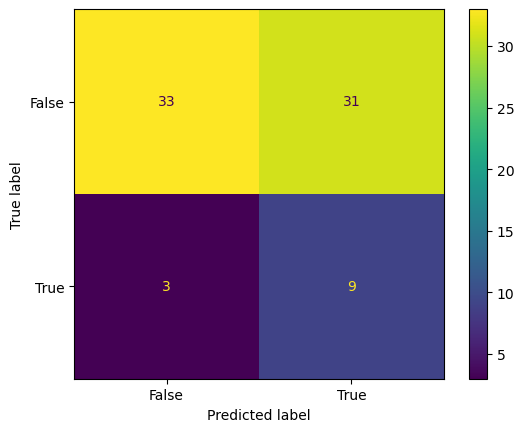

In [150]:
_ = ConfusionMatrixDisplay.from_predictions(df.y_true_transformer, df.y_pred_transformer)

In [58]:
# Prediction Classification "Correctness" for xgboost
threshold = 0.5 # using default classification threshold

df['xgboost_classifcation_performance_outcome'] = None

tmp = df['xgboost_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df.y_true_transformer & (df.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df.y_true_transformer) & (df.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df.y_true_transformer) & (df.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df.y_true_transformer & (df.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df['xgboost_classifcation_performance_outcome'] = tmp
df[['y_true_xgboost','y_pred_xgboost','xgboost_classifcation_performance_outcome']]

,y_true_xgboost,y_pred_xgboost,xgboost_classifcation_performance_outcome
0,False,True,wrongly predicted escalation
1,False,True,wrongly predicted escalation
2,False,True,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,True,True,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,True,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


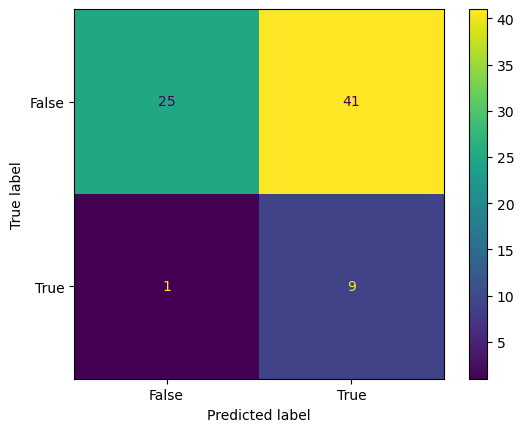

In [151]:
_ = ConfusionMatrixDisplay.from_predictions(df.y_true_xgboost, df.y_pred_xgboost)

In [59]:
# Prediction Classification "Correctness" for ffnn
threshold = 0.5 # using default classification threshold

df['ffnn_classifcation_performance_outcome'] = None

tmp = df['ffnn_classifcation_performance_outcome'].copy()
TP_pos_pred_correct = df.y_true_transformer & (df.y_pred_proba_transformer>threshold)
tmp[TP_pos_pred_correct] = "correctly predicted escalation"
TN_neg_pred_correct = (~df.y_true_transformer) & (df.y_pred_proba_transformer<=threshold)
tmp[TN_neg_pred_correct] = "correctly predicted no escalation"
FP_pos_pred_wrong = (~df.y_true_transformer) & (df.y_pred_proba_transformer>threshold)
tmp[FP_pos_pred_wrong] = "wrongly predicted escalation"
FN_neg_pred_wrong = df.y_true_transformer & (df.y_pred_proba_transformer<=threshold)
tmp[FN_neg_pred_wrong] = "wrongly predicted no escalation"

df['ffnn_classifcation_performance_outcome'] = tmp
df[['y_true_ffnn','y_pred_ffnn','ffnn_classifcation_performance_outcome']]

,y_true_ffnn,y_pred_ffnn,ffnn_classifcation_performance_outcome
0,False,False,wrongly predicted escalation
1,False,False,wrongly predicted escalation
2,False,False,correctly predicted no escalation
3,False,False,correctly predicted no escalation
4,False,False,correctly predicted no escalation
...,...,...,...
71,False,False,correctly predicted no escalation
72,False,False,correctly predicted no escalation
73,False,False,correctly predicted no escalation
74,False,False,correctly predicted no escalation


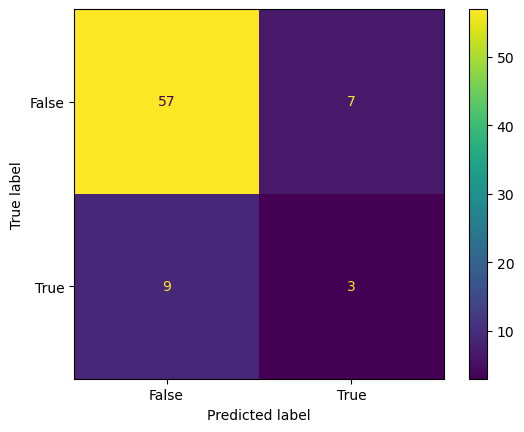

In [152]:
_ = ConfusionMatrixDisplay.from_predictions(df.y_true_ffnn, df.y_pred_ffnn)

# Step3

H0: p = 0.5\
Ha: p not 0.5

ffnn

In [80]:
# ffnn
data_1 = df[df['fsi_category'] == 'Warning']
dataerror_1 = data_1['ffnn_probability_prediction_error']
data_1

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,...,5.6,8.8,3.4,Warning,0.535385,0.660580,0.381938,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,...,5.6,8.8,3.4,Warning,0.538211,0.579952,0.364793,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,...,5.6,8.8,3.4,Warning,0.204810,0.652542,0.364343,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,...,5.2,7.1,3.7,Warning,0.461546,0.480096,0.398537,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,...,5.2,7.1,3.7,Warning,0.346367,0.410326,0.395459,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
5,202301,ID,False,0.398960,False,False,0.488815,False,False,0.401349,...,5.2,7.1,3.7,Warning,0.398960,0.488815,0.401349,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
12,202211,JO,False,0.224120,False,False,0.414194,False,False,0.458932,...,4.6,6.9,5.9,Warning,0.224120,0.414194,0.458932,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
13,202212,JO,False,0.222957,True,False,0.414615,False,False,0.455622,...,4.6,6.9,5.9,Warning,0.777043,0.414615,0.544378,wrongly predicted no escalation,wrongly predicted no escalation,wrongly predicted no escalation
14,202301,JO,False,0.231262,False,True,0.577142,True,False,0.451574,...,4.6,6.9,5.9,Warning,0.231262,0.422858,0.451574,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
24,202211,CB,True,0.622624,False,False,0.441517,False,False,0.394288,...,6.4,8.7,7.0,Warning,0.622624,0.441517,0.394288,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation


In [81]:
(data_1.ffnn_classifcation_performance_outcome == 'correctly predicted no escalation').mean()

0.3170731707317073

In [82]:
(data_1.ffnn_classifcation_performance_outcome == 'correctly predicted escalation').mean()

0.12195121951219512

In [83]:
0.317+0.122

0.439

In [125]:
# ffnn
data_2 = df[df['fsi_category'] != 'Warning']
dataerror = data_2['ffnn_probability_prediction_error']
data_2

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
6,202211,IS,True,0.634716,False,True,0.738002,False,False,0.343657,...,2.6,8.3,4.8,Stable,0.634716,0.738002,0.343657,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
7,202212,IS,True,0.692216,True,True,0.711610,False,False,0.341547,...,2.6,8.3,4.8,Stable,0.307784,0.711610,0.658453,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
8,202301,IS,True,0.687682,False,True,0.608835,True,False,0.344979,...,2.6,8.3,4.8,Stable,0.687682,0.391165,0.344979,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
9,202211,LE,True,0.587201,False,True,0.669344,True,False,0.398378,...,7.3,9.6,8.3,Alert,0.587201,0.330656,0.398378,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
10,202212,LE,True,0.578990,False,True,0.536716,False,False,0.400631,...,7.3,9.6,8.3,Alert,0.578990,0.536716,0.400631,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
11,202301,LE,True,0.534593,True,True,0.690374,False,False,0.398455,...,7.3,9.6,8.3,Alert,0.465407,0.690374,0.601545,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
15,202211,QA,False,0.176723,False,False,0.070106,False,False,0.274388,...,1.0,5.0,5.7,Stable,0.176723,0.070106,0.274388,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
16,202212,QA,False,0.177739,False,False,0.064143,False,False,0.271447,...,1.0,5.0,5.7,Stable,0.177739,0.064143,0.271447,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
17,202211,KU,False,0.174353,False,False,0.075832,False,False,0.322281,...,2.4,7.5,3.0,Stable,0.174353,0.075832,0.322281,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
18,202212,KU,False,0.189701,False,False,0.074495,False,False,0.323783,...,2.4,7.5,3.0,Stable,0.189701,0.074495,0.323783,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation


In [126]:
(data_2.ffnn_classifcation_performance_outcome == 'wrongly predicted escalation').mean()

0.2857142857142857

In [127]:
(data_2.ffnn_classifcation_performance_outcome == 'wrongly predicted no escalation').mean()

0.02857142857142857

In [87]:
0.2857+0.02857

0.31427

In [112]:
# error

In [88]:
data_1 = df[df['fsi_category'] == 'Warning']
dataerror_1 = data_1['ffnn_probability_prediction_error']
np.mean(dataerror_1)

0.4249548570731707

xgboost

In [134]:
# xgboost
data_1 = df[df['wbi_income_group'] == 'High income']
dataerror_1 = data_1['xgboost_probability_prediction_error']
data_1

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
6,202211,IS,True,0.634716,False,True,0.738002,False,False,0.343657,...,2.6,8.3,4.8,Stable,0.634716,0.738002,0.343657,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
7,202212,IS,True,0.692216,True,True,0.711610,False,False,0.341547,...,2.6,8.3,4.8,Stable,0.307784,0.711610,0.658453,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
8,202301,IS,True,0.687682,False,True,0.608835,True,False,0.344979,...,2.6,8.3,4.8,Stable,0.687682,0.391165,0.344979,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
15,202211,QA,False,0.176723,False,False,0.070106,False,False,0.274388,...,1.0,5.0,5.7,Stable,0.176723,0.070106,0.274388,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
16,202212,QA,False,0.177739,False,False,0.064143,False,False,0.271447,...,1.0,5.0,5.7,Stable,0.177739,0.064143,0.271447,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
17,202211,KU,False,0.174353,False,False,0.075832,False,False,0.322281,...,2.4,7.5,3.0,Stable,0.174353,0.075832,0.322281,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
18,202212,KU,False,0.189701,False,False,0.074495,False,False,0.323783,...,2.4,7.5,3.0,Stable,0.189701,0.074495,0.323783,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
22,202211,MU,False,0.243252,False,False,0.100111,False,False,0.318327,...,2.4,6.6,4.1,Stable,0.243252,0.100111,0.318327,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
23,202212,MU,False,0.273943,False,False,0.129337,False,False,0.321544,...,2.4,6.6,4.1,Stable,0.273943,0.129337,0.321544,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
71,202211,JA,False,0.163859,False,False,0.205914,False,False,0.273060,...,1.5,2.6,2.0,Stable,0.163859,0.205914,0.273060,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation


In [135]:
(data_1.xgboost_classifcation_performance_outcome == 'correctly predicted no escalation').mean()

0.7142857142857143

In [136]:
(data_1.xgboost_classifcation_performance_outcome == 'correctly predicted escalation').mean()

0.07142857142857142

In [137]:
data_2 = df[df['wbi_income_group'] == 'Lower middle income']
dataerror = data_2['xgboost_probability_prediction_error']
data_2

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,...,5.6,8.8,3.4,Warning,0.535385,0.660580,0.381938,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,...,5.6,8.8,3.4,Warning,0.538211,0.579952,0.364793,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,...,5.6,8.8,3.4,Warning,0.204810,0.652542,0.364343,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
3,202211,ID,False,0.461546,False,False,0.480096,False,False,0.398537,...,5.2,7.1,3.7,Warning,0.461546,0.480096,0.398537,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
4,202212,ID,False,0.346367,False,True,0.589674,True,False,0.395459,...,5.2,7.1,3.7,Warning,0.346367,0.410326,0.395459,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
5,202301,ID,False,0.398960,False,False,0.488815,False,False,0.401349,...,5.2,7.1,3.7,Warning,0.398960,0.488815,0.401349,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
9,202211,LE,True,0.587201,False,True,0.669344,True,False,0.398378,...,7.3,9.6,8.3,Alert,0.587201,0.330656,0.398378,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
10,202212,LE,True,0.578990,False,True,0.536716,False,False,0.400631,...,7.3,9.6,8.3,Alert,0.578990,0.536716,0.400631,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
11,202301,LE,True,0.534593,True,True,0.690374,False,False,0.398455,...,7.3,9.6,8.3,Alert,0.465407,0.690374,0.601545,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
24,202211,CB,True,0.622624,False,False,0.441517,False,False,0.394288,...,6.4,8.7,7.0,Warning,0.622624,0.441517,0.394288,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation


In [140]:
(data_2.xgboost_classifcation_performance_outcome == 'correctly predicted no escalation').mean()

0.41025641025641024

In [141]:
(data_2.xgboost_classifcation_performance_outcome == 'correctly predicted escalation').mean()

0.10256410256410256

In [ ]:
# error

In [101]:
data_1 = df[df['fsi_category'] == 'Warning']
dataerror_1 = data_1['xgboost_probability_prediction_error']
np.mean(dataerror_1)

0.5493496651571941

transformer

In [142]:
# transformer
data_1 = df[df['wbi_lending_category'] == 'IDA']
dataerror_1 = data_1['transformer_probability_prediction_error']
data_1

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
24,202211,CB,True,0.622624,False,False,0.441517,False,False,0.394288,...,6.4,8.7,7.0,Warning,0.622624,0.441517,0.394288,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
25,202212,CB,False,0.430438,False,False,0.495520,False,False,0.398258,...,6.4,8.7,7.0,Warning,0.430438,0.495520,0.398258,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
29,202211,BM,False,0.444116,False,True,0.763934,False,False,0.395985,...,9.1,9.0,7.3,Alert,0.444116,0.763934,0.395985,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
30,202212,BM,False,0.449590,False,True,0.758278,False,False,0.384911,...,9.1,9.0,7.3,Alert,0.449590,0.758278,0.384911,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
31,202301,BM,True,0.520781,False,True,0.764942,False,False,0.380714,...,9.1,9.0,7.3,Alert,0.520781,0.764942,0.380714,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
39,202211,BG,True,0.619812,False,True,0.564092,False,False,0.417691,...,6.8,9.3,4.6,Warning,0.619812,0.564092,0.417691,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
40,202212,BG,True,0.625523,False,True,0.552029,False,False,0.416145,...,6.8,9.3,4.6,Warning,0.625523,0.552029,0.416145,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
41,202301,BG,True,0.624302,False,True,0.576891,False,False,0.428320,...,6.8,9.3,4.6,Warning,0.624302,0.576891,0.428320,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
42,202211,NP,True,0.541297,True,True,0.691555,False,False,0.464957,...,5.5,8.8,5.9,Warning,0.458703,0.691555,0.535043,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
43,202212,NP,True,0.686276,False,True,0.668246,False,False,0.443688,...,5.5,8.8,5.9,Warning,0.686276,0.668246,0.443688,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation


In [143]:
(data_1.transformer_classifcation_performance_outcome == 'correctly predicted no escalation').mean()

0.43478260869565216

In [144]:
(data_1.transformer_classifcation_performance_outcome == 'correctly predicted escalation').mean()

0.13043478260869565

In [145]:
data_2 = df[df['wbi_lending_category'] != 'IBRD']
dataerror = data_2['transformer_probability_prediction_error']
data_2

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,...,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,transformer_probability_prediction_error,xgboost_probability_prediction_error,ffnn_probability_prediction_error,transformer_classifcation_performance_outcome,xgboost_classifcation_performance_outcome,ffnn_classifcation_performance_outcome
0,202211,UZ,True,0.535385,False,True,0.660580,False,False,0.381938,...,5.6,8.8,3.4,Warning,0.535385,0.660580,0.381938,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
1,202212,UZ,True,0.538211,False,True,0.579952,False,False,0.364793,...,5.6,8.8,3.4,Warning,0.538211,0.579952,0.364793,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
2,202301,UZ,False,0.204810,False,True,0.652542,False,False,0.364343,...,5.6,8.8,3.4,Warning,0.204810,0.652542,0.364343,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
6,202211,IS,True,0.634716,False,True,0.738002,False,False,0.343657,...,2.6,8.3,4.8,Stable,0.634716,0.738002,0.343657,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
7,202212,IS,True,0.692216,True,True,0.711610,False,False,0.341547,...,2.6,8.3,4.8,Stable,0.307784,0.711610,0.658453,correctly predicted escalation,correctly predicted escalation,correctly predicted escalation
8,202301,IS,True,0.687682,False,True,0.608835,True,False,0.344979,...,2.6,8.3,4.8,Stable,0.687682,0.391165,0.344979,wrongly predicted escalation,wrongly predicted escalation,wrongly predicted escalation
15,202211,QA,False,0.176723,False,False,0.070106,False,False,0.274388,...,1.0,5.0,5.7,Stable,0.176723,0.070106,0.274388,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
16,202212,QA,False,0.177739,False,False,0.064143,False,False,0.271447,...,1.0,5.0,5.7,Stable,0.177739,0.064143,0.271447,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
17,202211,KU,False,0.174353,False,False,0.075832,False,False,0.322281,...,2.4,7.5,3.0,Stable,0.174353,0.075832,0.322281,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation
18,202212,KU,False,0.189701,False,False,0.074495,False,False,0.323783,...,2.4,7.5,3.0,Stable,0.189701,0.074495,0.323783,correctly predicted no escalation,correctly predicted no escalation,correctly predicted no escalation


In [146]:
(data_2.transformer_classifcation_performance_outcome == 'wrongly predicted escalation').mean()

0.3488372093023256

In [147]:
(data_2.transformer_classifcation_performance_outcome == 'wrongly predicted no escalation').mean()

0.046511627906976744

In [148]:
# error

In [106]:
data_1 = df[df['fsi_category'] == 'Warning']
dataerror_1 = data_1['transformer_probability_prediction_error']
np.mean(dataerror_1)

0.5253960597560975

In [129]:
# ffnn bootstrap error
data = df['ffnn_probability_prediction_error']
bootstrap = []
rep = 1000
for i in range(rep):
    bootstrap += [(np.random.choice(data,size = 76, replace = True)).mean()]

confience_interval = np.quantile(bootstrap,[0.05,0.95])
confience_interval

array([0.39704471, 0.43680252])

In [132]:
# xgboost bootstrap error
data = df['xgboost_probability_prediction_error']
bootstrap = []
rep = 1000
for i in range(rep):
    bootstrap += [(np.random.choice(data,size = 76, replace = True)).mean()]

confience_interval = np.quantile(bootstrap,[0.05,0.95])
confience_interval

array([0.45558976, 0.52770672])

In [133]:
# transformer bootstrap error
data = df['transformer_probability_prediction_error']
bootstrap = []
rep = 1000
for i in range(rep):
    bootstrap += [(np.random.choice(data,size = 76, replace = True)).mean()]

confience_interval = np.quantile(bootstrap,[0.05,0.95])
confience_interval

array([0.44061906, 0.50874468])

# Step4

In [109]:
np.random.seed(100)
reps = 1000
rep = 1000
bootstrap_differences = np.zeros(rep)
group1 = df[df.fsi_category == 'Warning']['ffnn_probability_prediction_error']
group2 = df[df.fsi_category != 'Warning']['ffnn_probability_prediction_error']
for i in range(rep):
    sample1 = group1.sample(41, replace=True)
    sample2 = group2.sample(35, replace=True)
    difference = sample1.mean() - sample2.mean()
    bootstrap_differences[i] = abs(difference)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])
print(confidence_interval)

[0.00108323 0.06286678]


In [110]:
np.random.seed(100)
reps = 1000
rep = 1000
bootstrap_differences = np.zeros(rep)
group1 = df[df.fsi_category == 'Warning']['transformer_probability_prediction_error']
group2 = df[df.fsi_category != 'Warning']['transformer_probability_prediction_error']
for i in range(rep):
    sample1 = group1.sample(41, replace=True)
    sample2 = group2.sample(35, replace=True)
    difference = sample1.mean() - sample2.mean()
    bootstrap_differences[i] = abs(difference)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])
print(confidence_interval)

[0.03057455 0.18677983]


In [111]:
np.random.seed(100)
reps = 1000
rep = 1000
bootstrap_differences = np.zeros(rep)
group1 = df[df.fsi_category == 'Warning']['xgboost_probability_prediction_error']
group2 = df[df.fsi_category != 'Warning']['xgboost_probability_prediction_error']
for i in range(rep):
    sample1 = group1.sample(41, replace=True)
    sample2 = group2.sample(35, replace=True)
    difference = sample1.mean() - sample2.mean()
    bootstrap_differences[i] = abs(difference)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])
print(confidence_interval)

[0.02933472 0.21934281]
